# Open Data NYC - MTA Subway EDA

In [1]:
from dotenv import load_dotenv
from __init__ import get_base_path
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns
import sys

# environment
load_dotenv(get_base_path() + '/airbnb.env')
data_dir = get_base_path() + os.getenv('data_dir')

# Load and Prepare Data

In [2]:
# where to save clean data
clean_csv = 'CleanMTASubwayStops' + '.csv'

In [4]:
df = pd.DataFrame()

csv_path = data_dir + 'raw/' + 'SubwayStopsData.csv'
data = pd.read_csv(csv_path,index_col=0)
data.head(3)

,gtfs_stop_id,station_id,complex_id,division,line,stop_name,borough,cbd,daytime_routes,structure,...,south_direction_label,ada,ada_northbound,ada_southbound,georeference,:@computed_region_yamh_8v7k,:@computed_region_wbg7_3whc,:@computed_region_kjdx_g34t,ada_notes,last_modified
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,N W,Elevated,...,Manhattan,0,0,0,"{'type': 'Point', 'coordinates': [-73.912034, ...",196,877.0,2137.0,NaN,"Thu, 22 Aug 2024 18:09:53 GMT"
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,N W,Elevated,...,Manhattan,1,1,1,"{'type': 'Point', 'coordinates': [-73.917843, ...",196,874.0,2137.0,NaN,"Thu, 22 Aug 2024 18:09:53 GMT"
2,R04,3,3,BMT,Astoria,30 Av,Q,False,N W,Elevated,...,Manhattan,0,0,0,"{'type': 'Point', 'coordinates': [-73.921479, ...",196,874.0,2137.0,NaN,"Thu, 22 Aug 2024 18:09:53 GMT"


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 495
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gtfs_stop_id                 496 non-null    object 
 1   station_id                   496 non-null    int64  
 2   complex_id                   496 non-null    int64  
 3   division                     496 non-null    object 
 4   line                         496 non-null    object 
 5   stop_name                    496 non-null    object 
 6   borough                      496 non-null    object 
 7   cbd                          496 non-null    bool   
 8   daytime_routes               496 non-null    object 
 9   structure                    496 non-null    object 
 10  gtfs_latitude                496 non-null    float64
 11  gtfs_longitude               496 non-null    float64
 12  north_direction_label        496 non-null    object 
 13  south_direction_label    

In [152]:
required_columns = ['gtfs_stop_id','stop_name','borough','gtfs_latitude','gtfs_longitude','north_direction_label','south_direction_label','daytime_routes','structure','ada']
df = data.loc[:,required_columns]
df.head()

,gtfs_stop_id,stop_name,borough,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,daytime_routes,structure,ada
0,R01,Astoria-Ditmars Blvd,Q,40.775036,-73.912034,Last Stop,Manhattan,N W,Elevated,0
1,R03,Astoria Blvd,Q,40.770258,-73.917843,Astoria,Manhattan,N W,Elevated,1
2,R04,30 Av,Q,40.766779,-73.921479,Astoria,Manhattan,N W,Elevated,0
3,R05,Broadway,Q,40.761820,-73.925508,Astoria,Manhattan,N W,Elevated,0
4,R06,36 Av,Q,40.756804,-73.929575,Astoria,Manhattan,N W,Elevated,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 495
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gtfs_stop_id           496 non-null    object 
 1   stop_name              496 non-null    object 
 2   borough                496 non-null    object 
 3   gtfs_latitude          496 non-null    float64
 4   gtfs_longitude         496 non-null    float64
 5   north_direction_label  496 non-null    object 
 6   south_direction_label  496 non-null    object 
 7   daytime_routes         496 non-null    object 
 8   structure              496 non-null    object 
 9   ada                    496 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 42.6+ KB


In [154]:
boroughs = {
    'Bk':'Brooklyn',
    'M':'Manhattan',
    'Q':'Queens',
    'Bx':'Bronx',
    'SI':'Staten Island'
}

df['borough'] = df['borough'].map(boroughs)
df

,gtfs_stop_id,stop_name,borough,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,daytime_routes,structure,ada
0,R01,Astoria-Ditmars Blvd,Queens,40.775036,-73.912034,Last Stop,Manhattan,N W,Elevated,0
1,R03,Astoria Blvd,Queens,40.770258,-73.917843,Astoria,Manhattan,N W,Elevated,1
2,R04,30 Av,Queens,40.766779,-73.921479,Astoria,Manhattan,N W,Elevated,0
3,R05,Broadway,Queens,40.761820,-73.925508,Astoria,Manhattan,N W,Elevated,0
4,R06,36 Av,Queens,40.756804,-73.929575,Astoria,Manhattan,N W,Elevated,0
...,...,...,...,...,...,...,...,...,...,...
491,S15,Prince's Bay,Staten Island,40.525507,-74.200064,Ferry,South Shore,SIR,Open Cut,0
492,S14,Pleasant Plains,Staten Island,40.522410,-74.217847,Ferry,South Shore,SIR,Embankment,0
493,S13,Richmond Valley,Staten Island,40.519631,-74.229141,Ferry,Tottenville,SIR,Open Cut,0
494,S09,Tottenville,Staten Island,40.512764,-74.251961,Ferry,Last Stop,SIR,At Grade,1


In [155]:
df[['borough','structure','ada']] = df[['borough','structure','ada']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 0 to 495
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gtfs_stop_id           496 non-null    object  
 1   stop_name              496 non-null    object  
 2   borough                496 non-null    category
 3   gtfs_latitude          496 non-null    float64 
 4   gtfs_longitude         496 non-null    float64 
 5   north_direction_label  496 non-null    object  
 6   south_direction_label  496 non-null    object  
 7   daytime_routes         496 non-null    object  
 8   structure              496 non-null    category
 9   ada                    496 non-null    category
dtypes: category(3), float64(2), object(5)
memory usage: 33.0+ KB


In [156]:
# save clean data
df.to_csv(data_dir + clean_csv)

# EDA

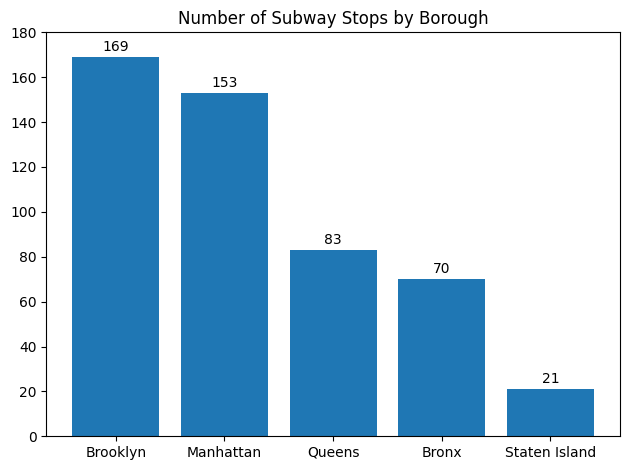

In [157]:
%matplotlib inline

boroughs = df['borough'].value_counts().to_dict()
b = plt.bar(x=boroughs.keys(),height=boroughs.values(),label=boroughs.keys())
plt.bar_label(b,padding=2)
plt.ylim((0,180))
plt.title('Number of Subway Stops by Borough')
plt.tight_layout()